In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

/home/user1/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/user1/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/user1/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/user1/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

In [2]:
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
#import cv2
#cap = cv2.VideoCapture(0)

In [5]:
#print(sys.path)

In [7]:
%%bash
pwd

/home/user1/MyProjects/tf_models/research/object_detection


In [8]:
sys.path.append("..")

In [9]:
from utils import label_map_util
from utils import visualization_utils as vis_util

In [10]:
# What model to download.
MODEL_NAME = 'my-lisa-tf-detector-graph'

In [11]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'lisa_label_map.pbtxt')

NUM_CLASSES = 4

In [12]:
print(PATH_TO_LABELS)

data/lisa_label_map.pbtxt


In [1]:
### Download Model (not needed)
#opener = urllib.request.URLopener()
#opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
#tar_file = tarfile.open(MODEL_FILE)
#for file in tar_file.getmembers():
#  file_name = os.path.basename(file.name)
#  if 'frozen_inference_graph.pb' in file_name:
#    tar_file.extract(file, os.getcwd())

In [13]:
print(os.getcwd())

/home/user1/MyProjects/tf_models/research/object_detection


In [13]:
### extract frozon inference graph file (done)
#tar_file = tarfile.open(MODEL_FILE)
#for file in tar_file.getmembers():
#    print(file)
#    file_name = os.path.basename(file.name)
#    print(file_name)

## Load a (frozen) Tensorflow model into memory.

In [16]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.io.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

## Loading label map

Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine


In [17]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [20]:
print(category_index)

{1: {'id': 1, 'name': 'stop'}, 2: {'id': 2, 'name': 'warning'}, 3: {'id': 3, 'name': 'go'}, 4: {'id': 4, 'name': 'warningLeft'}}


### Helper code

In [21]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [38]:
def get_label_name(label):
    if label == 1:
        return "stop"
    elif label == 2:
        return "warning"
    elif label == 3:
        return "go"
    elif label == 4:
        return "warningLeft"
    else:
        return "UNKNOWN"

### Test detection

In [54]:
PATH_TO_TEST_IMAGES_DIR = 'lisa-images/test'
TEST_GREEN_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'dayClip2--00{}.jpg'.format(i)) for i in range(596, 610,1) ]
TEST_YELLOW_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'dayClip5--000{}.jpg'.format(i)) for i in range(51, 61,1) ]
TEST_RED_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'dayClip11--00{}.jpg'.format(i)) for i in range(105, 116,1) ]
ADD_TEST_RED_PATHS = [ os.path.join('lisa-images/additional-test', 'dayClip8--000{}.jpg'.format(i)) for i in range(10, 21,1) ]
print(ADD_TEST_RED_PATHS[1])

'lisa-images/test/google-image1.jpg'

# Size, in inches, of the output images.
IMAGE_SIZE = (16, 9)


lisa-images/additional-test/dayClip8--00011.jpg


## Single image detection

class: 1 name: stop score: 0.96836233
class: 1 name: stop score: 0.9551889
class: 1 name: stop score: 0.90628314
class: 1 name: stop score: 0.9817311
class: 1 name: stop score: 0.97184193
class: 1 name: stop score: 0.9218428
class: 1 name: stop score: 0.98315
class: 1 name: stop score: 0.9719677
class: 1 name: stop score: 0.9219381
class: 1 name: stop score: 0.970786
class: 1 name: stop score: 0.9371174
class: 1 name: stop score: 0.92787594
class: 1 name: stop score: 0.9824662
class: 1 name: stop score: 0.94936913
class: 1 name: stop score: 0.9362478
class: 1 name: stop score: 0.9943306
class: 1 name: stop score: 0.96106094
class: 1 name: stop score: 0.88641834
class: 1 name: stop score: 0.98902285
class: 1 name: stop score: 0.9438798
class: 1 name: stop score: 0.9245639
class: 1 name: stop score: 0.9825709
class: 1 name: stop score: 0.94239867
class: 1 name: stop score: 0.9137986
class: 1 name: stop score: 0.98506325
class: 1 name: stop score: 0.9789649
class: 1 name: stop score: 0.83

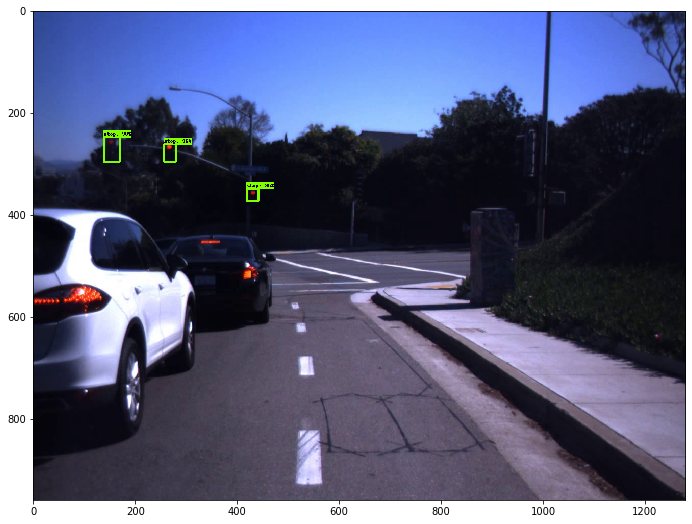

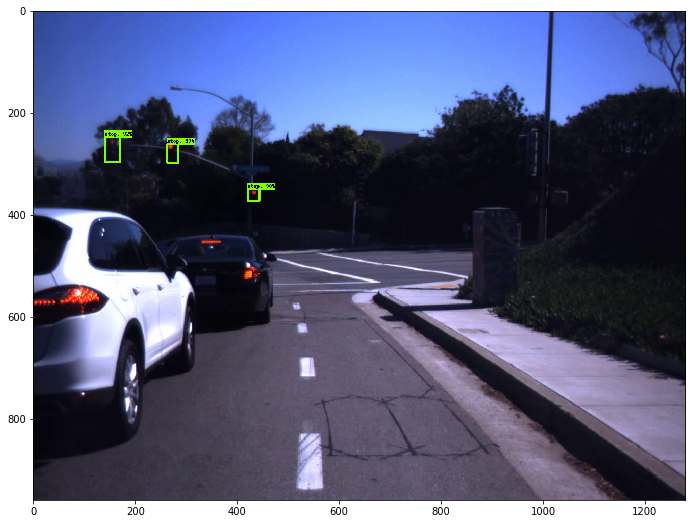

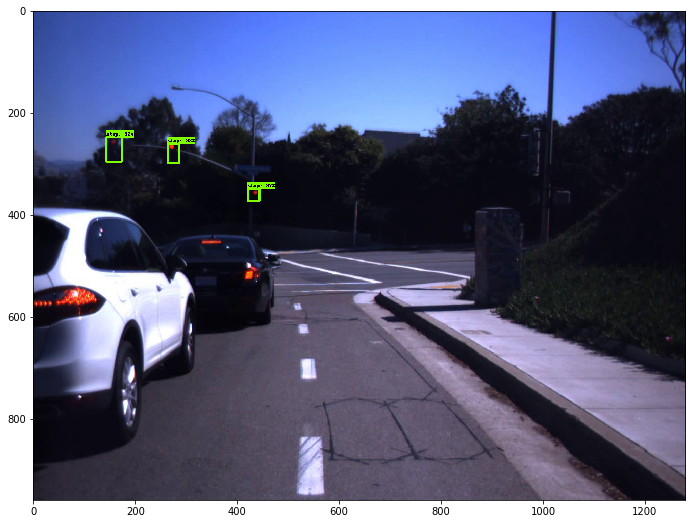

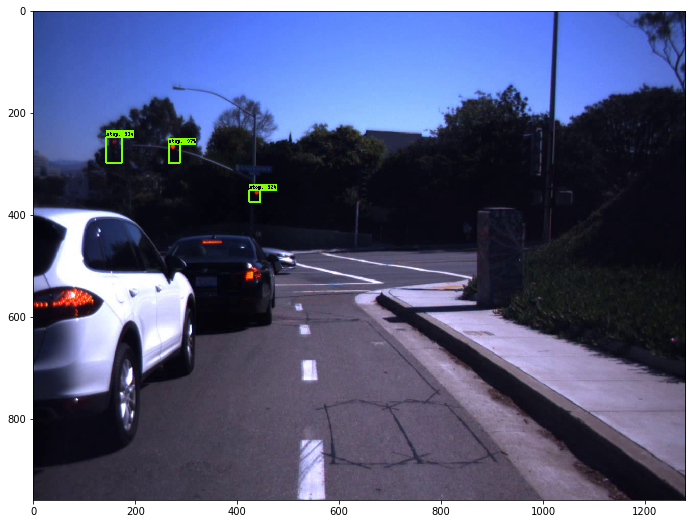

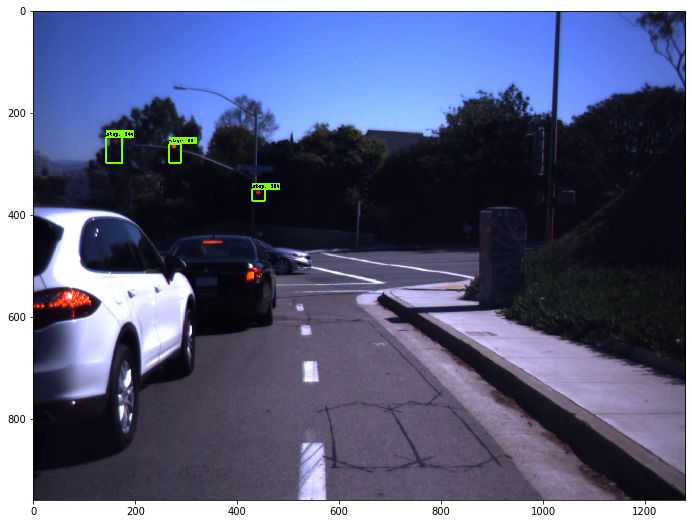

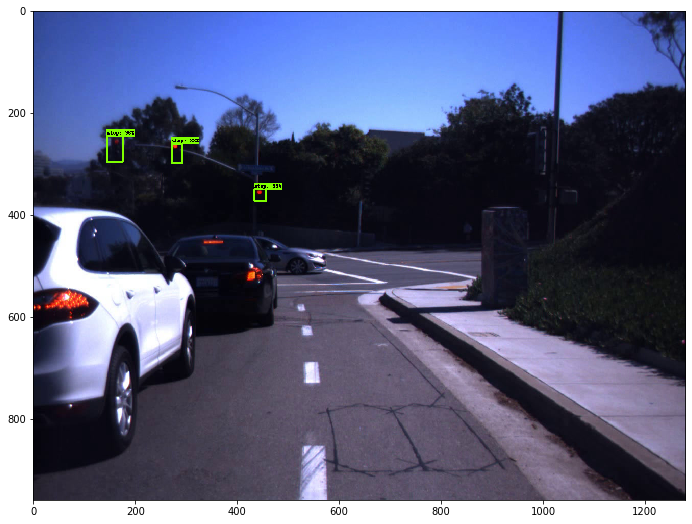

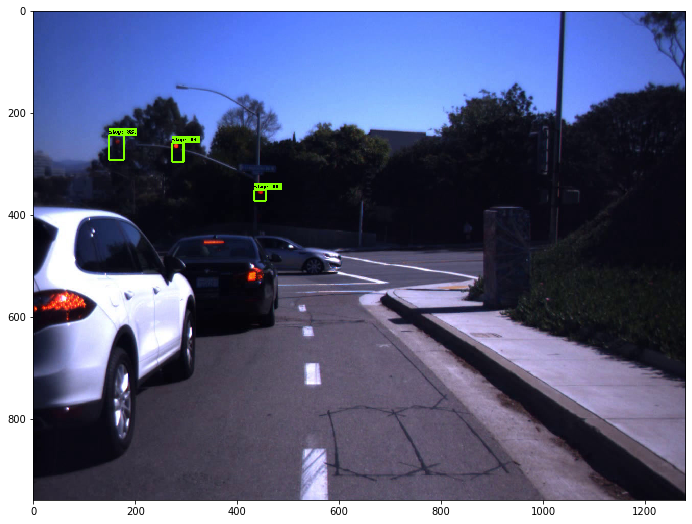

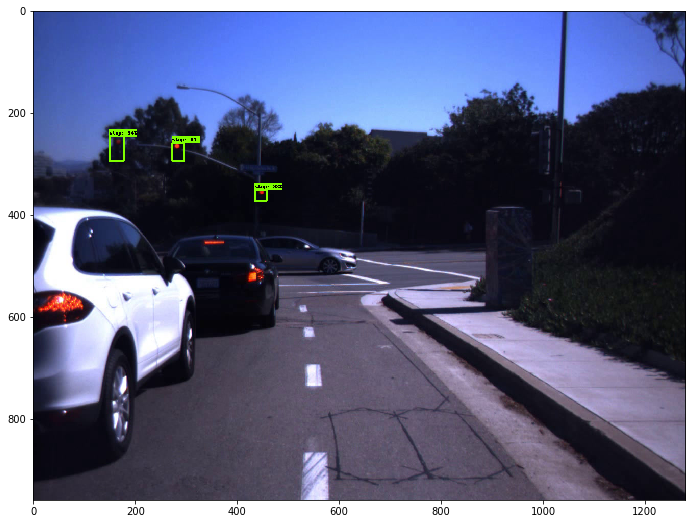

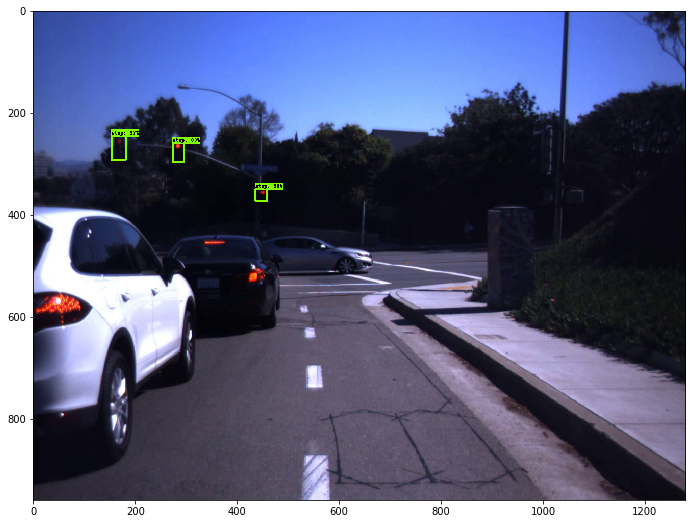

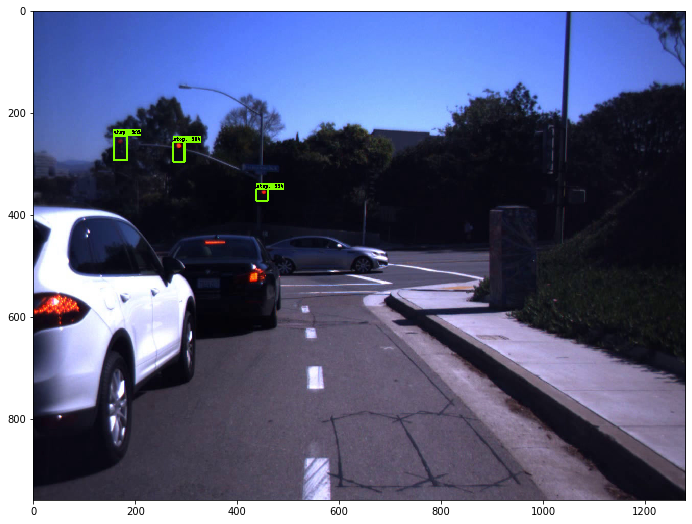

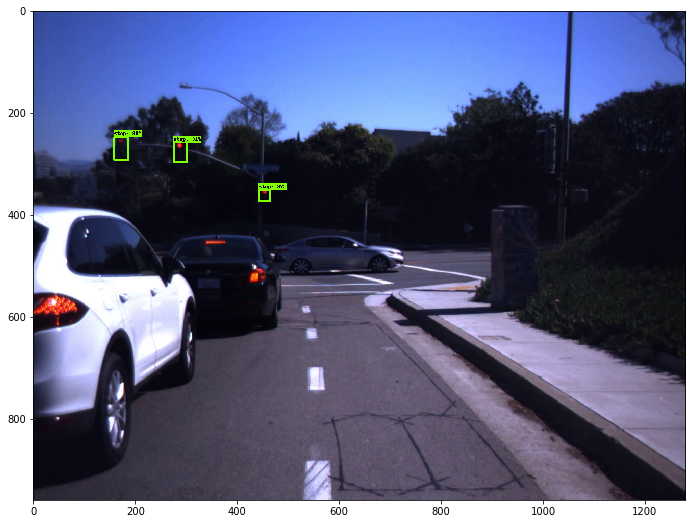

In [58]:
get_ipython().magic('matplotlib inline')
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for image_path in TEST_RED_PATHS:
            
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
        
            boxes = np.squeeze(boxes)
            classes = np.squeeze(classes).astype(np.int32)
            scores = np.squeeze(scores)
            SHOW_THRESH = 0.1
            #print detections
            for i in range(len(scores)):
                if scores[i]>SHOW_THRESH:
                    print("class:", classes[i],"name:",get_label_name(classes[i]),"score:",scores[i])
        
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                boxes,
                classes.astype(np.int32),
                scores,
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=SHOW_THRESH,
                line_thickness=4)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)

            #cv2.imshow('object detection', cv2.resize(image_np, (800,600)))
            #if cv2.waitKey(25) & 0xFF == ord('q'):
              #cv2.destroyAllWindows()
              #break

## Video stream detection

# with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        
        while True:
            ret, image_np = cap.read()
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8)

            cv2.imshow('object detection', cv2.resize(image_np, (800,600)))
            if cv2.waitKey(25) & 0xFF == ord('q'):
                cv2.destroyAllWindows()
                break